In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 14 and 15

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 
   
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

- If tasked with manually clustering documents from this toy corpus, how many clusters would you identify, and what labels would you assign to each cluster?
</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 K-Means with bag-of-words representation 
rubric={accuracy}

In the lecture, we explored how **data representation significantly impacts clustering quality**. We saw that replacing a **flattened image representation** with feature vectors extracted from **pre-trained models** greatly improved clustering results.  

What about text data? In previous machine learning courses, we have used the **bag-of-words (BoW) representation** to numerically encode text, where each document is represented with a vector of word frequencies. 

In this exercise, you will **cluster documents** using this **simplistic text representation**.  

<div class="alert alert-info">

**Your tasks:**

1. Use [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with its **default settings** to transform the `text` column in `wiki_df` into a numerical representation.  

2. Use [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the encoded documents and store the cluster labels in `kmeans_bow_labels`.  
   - Set `random_state=42` for **reproducibility**.
     
   - Use the **number of clusters** (`n_clusters`) identified in the **previous exercise**.  
</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 K-Means with sentence embedding representation
rubric={accuracy}

In the previous exercise, you may have noticed that clustering results were suboptimal. While the bag-of-words (BoW) representation is useful, it has significant limitations. It does not capture word order or context effectively.  

To improve text representation, we can use pre-trained models, similar to those used for image data, to extract richer, context-aware embeddings through transfer learning. In this lab, we will use the **pre-trained model** `'all-MiniLM-L6-v2'`, available via the [Sentence Transformers](https://www.sbert.net/index.html) package.  

This deep learning model generates **dense, fixed-length vector representations** of sentences, capturing **semantic meaning and contextual information**. These representations are particularly effective for **clustering and semantic similarity tasks**. If you're interested in exploring more **pre-trained models**, refer to the [full list here](https://www.sbert.net/docs/pretrained_models.html). We will explore these representations further in **DSCI 575**.  

<div class="alert alert-info">

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus.
   
3. Apply `KMeans` to the **sentence embeddings** (`emb_sents`) and store the cluster labels in `kmeans_emb_labels`. Use the following parameters:  
    - `random_state=42` (for reproducibility)
      
    - `n_clusters`=the number of clusters you identified in 1.1

Note
- The code below might throw a warning. You may ignore it for the purpose of this lab. 
</div>

In [8]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

In [9]:
emb_sents = embedder.encode(wiki_df["text"].tolist())
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.005857,-0.004795,-0.000976,0.011121,0.005294,-0.061630,0.062072,0.033673,-0.035251,0.074072,...,0.088312,-0.006600,0.036511,-0.020797,-0.002082,0.058263,0.061880,0.097383,0.058155,-0.052016
1,-0.124845,-0.084891,0.082492,0.017458,0.022980,0.056852,-0.060654,-0.060344,-0.020284,-0.070915,...,0.082265,0.009324,-0.005930,-0.130974,0.002398,0.052424,-0.008989,0.015588,-0.017661,-0.018494
2,-0.056721,-0.049697,-0.014780,0.022572,0.051773,0.007456,0.008632,-0.074847,-0.065573,-0.027284,...,0.014761,-0.022392,0.021360,-0.107016,0.020530,0.045678,0.052755,0.005429,0.022018,-0.010994
3,-0.072006,0.006120,-0.085242,0.051515,-0.119036,0.015745,-0.006809,-0.064673,0.004276,0.018435,...,-0.067665,0.031661,-0.017610,-0.072480,-0.008318,0.127195,0.033353,0.084555,0.015100,0.020704
4,-0.012700,0.101830,0.066676,-0.007987,0.140040,0.041627,0.035495,-0.050723,-0.037633,0.055886,...,-0.042105,-0.038883,0.018268,0.009920,0.028208,0.052759,-0.009605,-0.004518,0.060853,0.057709
5,-0.014444,0.022869,0.145982,0.054865,0.085204,-0.014689,-0.102757,0.016853,-0.023799,0.021148,...,0.011778,0.016817,-0.020041,0.006375,0.055428,0.076868,-0.047152,-0.114797,-0.056382,0.022349
6,-0.044869,0.076882,-0.012749,0.033335,0.067894,-0.002327,0.031620,-0.021576,0.046619,0.005089,...,-0.021575,-0.017596,-0.069995,0.004461,-0.040409,-0.043067,0.044042,-0.050977,0.056506,0.048708
7,0.027806,0.077117,0.015402,-0.013544,0.043216,0.048124,0.027763,-0.022999,0.049303,0.009686,...,0.014946,-0.020896,0.022283,-0.012311,0.014079,0.028085,0.025272,-0.015233,-0.014879,-0.064280
8,0.026616,-0.019929,-0.008049,-0.025907,-0.055372,0.011235,-0.024538,-0.065724,0.058374,-0.062895,...,-0.059513,0.077446,-0.059827,-0.021454,0.088102,-0.127180,-0.031399,0.120572,0.072373,-0.058336
9,-0.014786,0.055887,-0.020880,0.005313,-0.025037,0.040478,0.035260,0.024938,0.017546,0.072433,...,-0.082098,0.037856,-0.020007,-0.087251,0.058163,-0.044187,-0.030253,-0.080385,0.075614,-0.070403


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with sentence embedding representation and cosine distance  
rubric={accuracy}

Now, let's apply [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to our toy dataset.  

Unlike K-Means, which relies on Euclidean distance due to its use of centroids, DBSCAN allows us to experiment with different distance metrics. For text data, [**cosine similarity**](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) (or its complement, **cosine distance**) is often more effective than Euclidean distance.  

The **cosine distance** between two vectors $u$ and $v$ is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

<div class="alert alert-info">

**Your tasks:**

- Apply **DBSCAN** to cluster documents encoded with **sentence embeddings** (`emb_sents`) and store the cluster labels in `dbscan_emb_labels`.
    
- Set `metric='cosine'` to use **cosine distance** for clustering.
- Tune the **hyperparameters** `eps` and `min_samples` to obtain meaningful clusters, as the default values are unlikely to work well on this dataset.  

**Notes for tuning the hyperparameters:**

- Start by examining the minimum, maximum, and mean cosine distances in the dataset. You can compute pairwise cosine distances using the package imported below.
  
- Experiment with a range of `eps` values and print the number of clusters and their sizes for each value.
- Select the `eps` value that produces the desired number of clusters.


</div>

In [13]:
from sklearn.metrics.pairwise import cosine_distances

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={accuracy}

<div class="alert alert-info">

**Your tasks:**

Apply hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.

3. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

</div>

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
- effect of input representation on clustering results

- whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

</div>

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

<div class="alert alert-info">
    
**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation
</div>

In [22]:
import umap

In [23]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_texts=None,
    show_labels=False,
    point_size=50,
    n_neighbors=15,
    title="UMAP Visualization",
    ignore_noise=False,
):
    """
    Perform dimensionality reduction using UMAP and visualize the resulting clusters.

    Parameters
    ----------
    data : np.ndarray
        Feature matrix to be reduced.
    cluster_labels : array-like
        Cluster label for each data point.
    raw_texts : list of str, optional
        Original texts corresponding to the data points (used when show_labels=True).
    show_labels : bool, default=False
        Whether to annotate points with text labels.
    point_size : int, default=50
        Size of the scatterplot points.
    n_neighbors : int, default=15
        Number of neighbors used in UMAP.
    title : str, default="UMAP Visualization"
        Title of the plot.
    ignore_noise : bool, default=False
        Whether to exclude points labeled as noise (-1).

    Returns
    -------
    None
    """
    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    embedding = reducer.fit_transform(data)

    df = pd.DataFrame(embedding, columns=["dim1", "dim2"])
    df["cluster"] = cluster_labels

    if ignore_noise:
        df = df[df["cluster"] != -1]

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        df["dim1"], df["dim2"],
        c=df["cluster"], cmap="tab20b", s=point_size
    )

    ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")

    if show_labels and raw_texts is not None:
        for (x, y, text) in zip(df["dim1"], df["dim2"], raw_texts):
            ax.annotate(" ".join(text.split()[:10]), (x, y), fontsize=8)

    plt.show()


<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this assignment, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

</div>

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**

</div>

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [34]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state, replace=replace)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice.

</div>

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

Using k ranging from 3 to 12 in my KMeans approach, I analyzed the elbow and silhouette plots, and found two promising models (k = 5 and k = 11) to analyze further. 


My decision to consider k = 5 was based on a noticeable spike in the silhouette score, suggesting moderately well-separated clusters that still captured broad groupings. As for k = 11, we can see that this model achieved both a higher silhouette score and lower inertia, indicating more compact and well-defined clusters.

With k = 5, I noticed some general clustering that seemed appropriate, like cookies and cakes, but also a few clusters that mixed unrelated recipes together (ie. lemonade and ginger crinkles). Contrarily, when I used k = 11, the clusters grew a lot more specific and a lot cleaner. For example, categories like dessert bars, chicken recipes, salads, and drinks all became distinct clusters. Because of the more intuitive and clearer separation between categories with k = 11, I picked this model as the better model for this dataset. However, the “best” number of clusters ultimately depends on the desired level of granularity - if broader themes were preferred, a smaller k might be more appropriate, whereas finer distinctions could justify an even higher k. But since I found the clustering at k = 11 to be quite interpretable, I decided to stick with this model.

In [35]:
from sklearn.metrics import silhouette_score
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

k_values = list(range(2, 13))
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    labels = kmeans.fit_predict(embeddings)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(embeddings, labels))

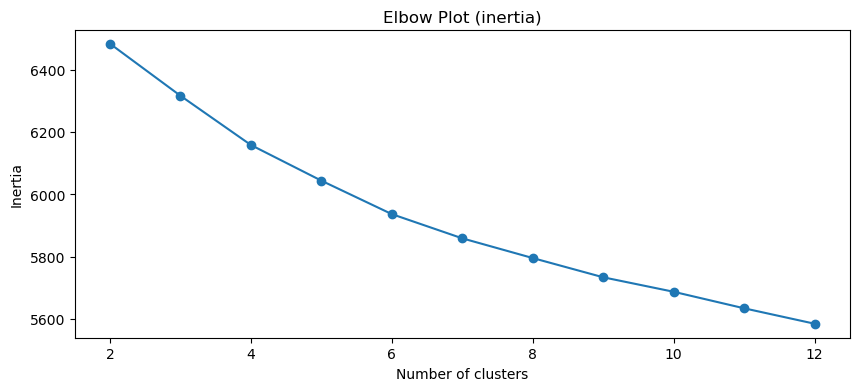

In [36]:
plt.figure(figsize = (10,4))
plt.plot(k_values, inertias, marker = "o")
plt.title("Elbow Plot (inertia)")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

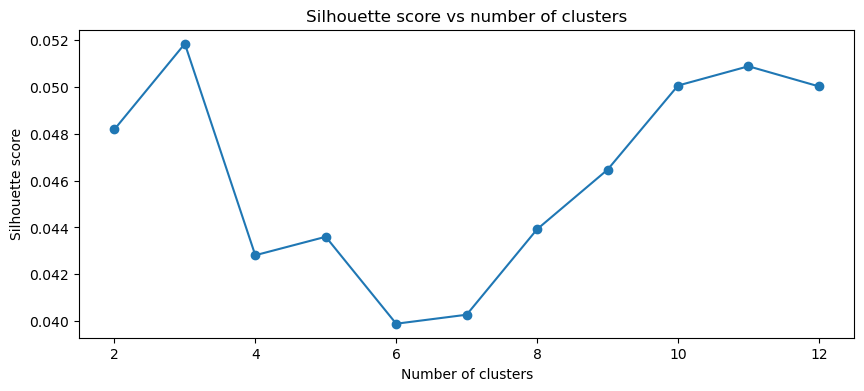

In [37]:
plt.figure(figsize = (10,4))
plt.plot(k_values, silhouettes, marker='o')
plt.title("Silhouette score vs number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [38]:
# output not shown for submission into gradescope to allow proper rendering - essentially same as below but for different k
kmeans_5 = KMeans(n_clusters = 5, random_state =  42, n_init = 10)
labels_5 = kmeans_5.fit_predict(embeddings)

print("Sample clusters for k = 5:")
print_clusters(recipes_df, labels_5, n_recipes = 5, random_state = 42)

Sample clusters for k = 5:
Cluster 0
----------
southside lemonade
ginger crinkles
banana cream pie martini
adult cherry cola drink
butterscotch mudslide shake



Cluster 1
----------
ginger cake iced in lemon
rosemary  rose  and blackberry cake
lemon lavender layer cake
chocolate cheesecake  unbaked
nameless spice cake



Cluster 2
----------
hot chinese chicken salad
creamy greek dressing with feta
rigatoni with pumpkin and bacon sauce
turkey taco skillet
israeli couscous with mint and lemon



Cluster 3
----------
black walnut cream cookies
toffee bits cookies
cream cheese bar cookies
waffle cookies
cow pattie cookies



Cluster 4
----------
chubby bunnies
magnolia cafe oatmeal muffins
creamy baked eggs
burstin  berries double chocolate muffins
dks buttermilk biscuits





In [39]:
kmeans_11 = KMeans(n_clusters = 11, random_state =  42, n_init = 10)
labels_11 = kmeans_11.fit_predict(embeddings)

print("Sample clusters for k = 11:")
print_clusters(recipes_df, labels_11, n_recipes = 5, random_state = 42)

Sample clusters for k = 11:
Cluster 0
----------
mini seafood cakes with creamy lemon sauce
lemon lavender layer cake
banana cake made simple
fudgy peanut butter swirl cake
jack robinson cake



Cluster 1
----------
apple pie martini
comforting cold and flu tea
courage cocktail
campechana  rum
limey apricot rum cooler



Cluster 2
----------
peanut butter reese s pieces cookies
healthy oatmeal cookies
texas cowboy cookies
lemon filled dreams  cookies
marshmallow fudge cookies



Cluster 3
----------
chipped beef on toast
cabernet braised beef short ribs
make ahead meatballs
the rendezvous style rub for ribs
saudi fish curry  samak quwarmah



Cluster 4
----------
mexican pasta vegetable bake
chili stuffed baked potato
vegetable florets pasta bake
margherita pita pizzas
cheddar zucchini puff  from better homes   gardens



Cluster 5
----------
perfect garlic bread from scratch
made from scratch broccoli cornbread
sunflower oatmeal bread  bread machine
oat bread
one of a kind bread puddi

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`.

</div>

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

I tried a few different values for the eps and min_samples hyperparameters to identify an optimal range. I ended up identfying 22 clusters using cosine distance with eps = 0.3 and min_samples = 5. While the silhouette score was slightly negative (~ - 0.17), manual inspection of the clusters revealed clustering that was logical. For example, tea recipes, chicken recipes, lasagna recipes, etc...

Throughout my search, I found that DBSCAN’s performance was highly dependent on the eps parameter, where smaller values produced too many noise points, while larger values merged distinct groups. Since DBSCAN is well suited for finding small dense groups, the smaller cluster sizes made logical sense for the dataset, as there is a wide range of categories that makes more sense to keep split into more distinct groups.

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps = 0.3
min_samples = 5

dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric = "cosine")
dbscan_labels = dbscan.fit_predict(embeddings)

In [41]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

if n_clusters > 1:
    score = silhouette_score(embeddings, dbscan_labels, metric = "cosine")
    print(f"Silhouette score: {score}")

print_clusters(recipes_df, dbscan_labels, n_recipes = 3, random_state = 42)

Number of clusters found: 22
Silhouette score: -0.16683094203472137
Cluster -1
----------
boneless buffalo chicken calzone
kato s phyllo chicken surprise
gooseberry tart



Cluster 0
----------
chocolate banana bread puddings
the best soft and chewy chocolate chip cookies in the world
dark chocolate peanut butter brownies



Cluster 1
----------
beef stew with butternut squash
a  butternut   acorn squash gratin
gingered roast butternut squash



Cluster 2
----------
classic strawberries and cream
raspberry chocolate trifle
amaretto shake



Cluster 3
----------
skinny chai tea
tangerine tea
narangi ki chai  tangerine tea



Cluster 4
----------
melissa s easy chicken and dumplings
babbling brooks chicken and dumplings
low fat chicken and dumplings



Cluster 5
----------
bloody mary cocktail
bloody marys with attitude
zesty bloody mary



Cluster 6
----------
french butter creams
butter cream
butter cream shot



Cluster 7
----------
caramelized onion   gorgonzola mashed potatoes
cumin

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

</div>

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

For this clustering method, I used the sentence embeddings with method = "complete" as well as metric = "cosine". From there, I plotted the dendrogram to visualize how the cutoff should be implemented. I noticed that with small changes in the cutoff value using the distance criterion, there were pretty substantial changes in the number of clusters (ie. lowering this from t = 0.9 to t = 0.75 increased the number of clusters from 17 to 30).

I optimized the cutoff to reflect what I found most intuitive, at t = 0.9. Here, there are lots of logical clustering such as pork recipes, muffin/cake recipes, and martini/cocktail recipes, however because of the immense number of recipes, at this granularity, there is still some noise and mixing of different categories. This is somewhat to be expected given there isn't enough information in the name alone for the model to separate everything perfectly. Additionally, I noticed some unrelated recipes that had similar words in them (ie. pepper-mint snap cookies and stuffed bell peppers) were grouped together, which is definitely a flaw to our clustering approach.

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [43]:
Z_hier = linkage(embeddings, method = "complete", metric = "cosine")

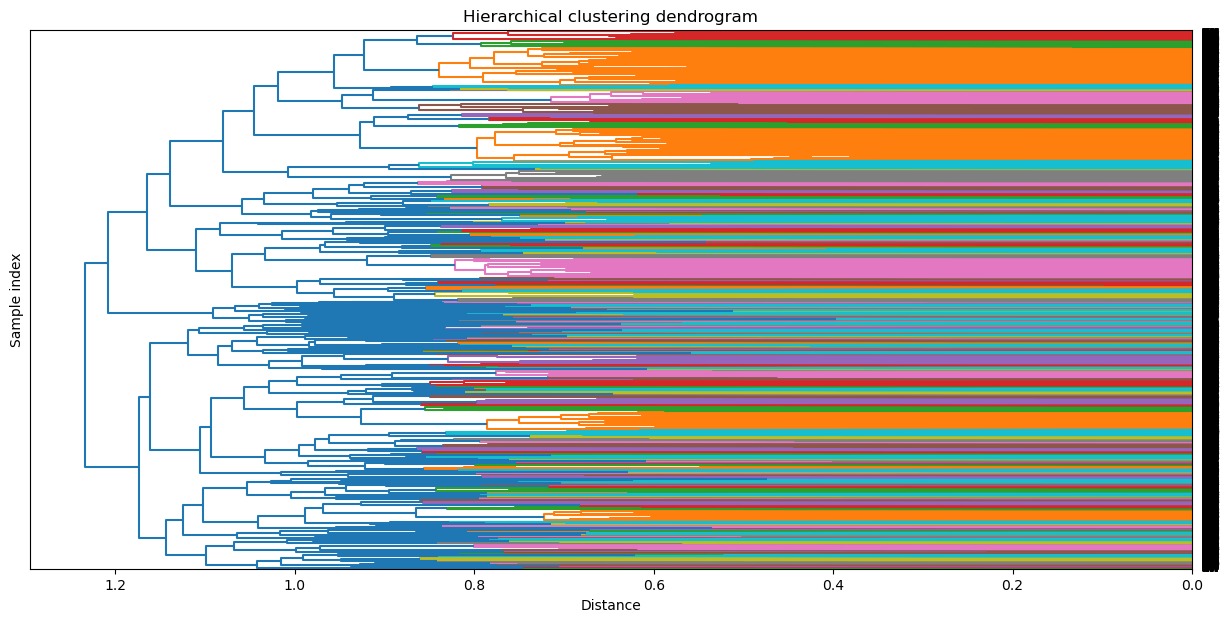

In [44]:
plt.figure(figsize = (15, 7))
dendrogram(Z_hier, orientation = "left")
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Distance")
plt.ylabel("Sample index")
plt.show()

In [45]:
hier_labels = fcluster(Z_hier, 1.09, criterion = "distance")

In [46]:
print_clusters(recipes_df, hier_labels, n_recipes = 4, random_state = 42)

Cluster 1
----------
chicken with bacon
bacon cheddar bread
debbie s divine dessert
apple orchard bean bake



Cluster 2
----------
tasty dip
raspberry strippers
rogene s chocolate crinkles
daffodil dip



Cluster 3
----------
frexca
chicken with prosciutto and bean puree
my favorite pecan pie
bordello



Cluster 4
----------
fabulous ham bone and lentil soup
collard green   black eyed pea soup
tony diramio s official ham bone soup
liz s spicy chicken and green chile soup



Cluster 5
----------
peppermint snaps
ma s stuffed bell peppers
cilantro lime vinaigrette
buttercream torte



Cluster 6
----------
thai basil mojito
lemongrass  lime   thai basil mojito
pearl tea
cherry mint iced tea



Cluster 7
----------
hamburger rice skillet
killer carrot cake
chicken bow tie pasta ii
banana pudding nut bread



Cluster 8
----------
herb grilled chicken salad with strawberries and feta cheese
low cal  low fat creamy mustard dressing   delicious
marinated veggie beef kabobs
ramen cabbage salad

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods?

</div>

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

### KMeans
With k=11 clusters were well-separated and semantically meaningful.
Common themes included 
- Desserts and baked goods (cakes, cookies, brownies, bars)
- Drinks and cocktails (martinis, smoothies, rum coolers)
- Savory dishes (chicken entrées, salads, pasta bakes, breads)
While some clusters (e.g., cakes and cookies) were very coherent and logical, a few contained mixed items (ie. Cluster 8: wakey wakey, bocci ball, and mamaliga recipes), reflecting occasional noise due to ambiguous or short recipe names. Overall, KMeans produced broad but intuitive categories.

### DBSCAN
DBSCAN, tuned with eps=0.3 and min_samples=5, generated 22 clusters as well as a some items that didn't fit into any of the clusters. Here, distinct themes included things like
- Desserts (cookies, brownies, buttercream, trifles)
- Meat dishes (chicken, steak, scallopini, pork medallions)
- Baked meals and sides (lasagna, au gratin potatoes, mashed potatoes)
- Beverages (Bloody Mary, chai tea, breeze cocktails)
Clusters were highly specific and clean, often grouping near-identical dishes or flavor variants (ie. variations of the “Bloody Marys” or “chicken scallopini”). However, the silhouette score was slightly negative, which suggests there was uneven cluster density and overlap — a common drawback with text embeddings and DBSCAN sensitivity to eps.

### Hierarchical Clustering
Hierarchical clustering with cosine distance and complete linkage revealed fine-grained and interpretable groupings:
- Soups and stews (ham bone soup, lentil soup, chicken chile soup)
- Desserts and sweets (cupcakes, bars, frosting, lemon desserts)
- Meat entrées (pork shoulder, meatloaf, chicken dishes)
- Drinks (mojitos, martinis, coolers)
Compared to KMeans, the hierarchical approach produced smaller, nuanced clusters, sometimes mixing a few unrelated recipes but still showing clear themes. The dendrogram also provided an interpretable view of how recipes group at different similarity thresholds.

### Common Themes
Across all three methods, core themes consistently appeared between the different approaches - notably desserts, drinks, chicken dishes, and baked meals.
However:
- KMeans captured broader/more general categories, which was simpler but could be slightly more or less interpretable depending on the context and the goal.
- DBSCAN yielded highly specific, fine-grained clusters, but struggled with noise and cluster sensitivity.
- Hierarchical clustering offered the best interpretability, and to me seemed the easiest to optimize, as the visualization made it much more clear how small changes in `t` would affect clustering.

Overall, I was able to achieve meaningful clusters that made sense with regards to the data. There were definitely some clusters that had some noise, but for the most part, I think my attempts with these clustering approaches seemed successful.

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Here is a quick checklist before submitting: 

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  

![](img/eva-well-done.png)